In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_excel('retail.xlsx')

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.shape

(541909, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# EDA:

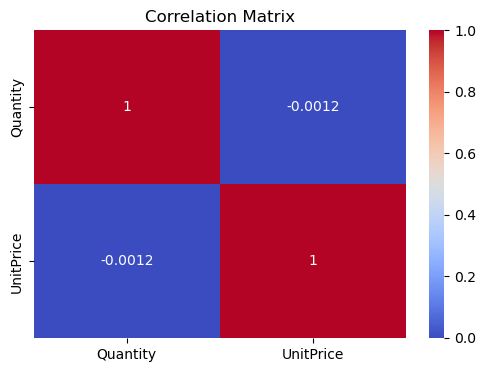

In [10]:
# HeatMap

corr_matrix = df[['Quantity', 'UnitPrice']].corr()

plt.figure(figsize=(6, 4))
 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

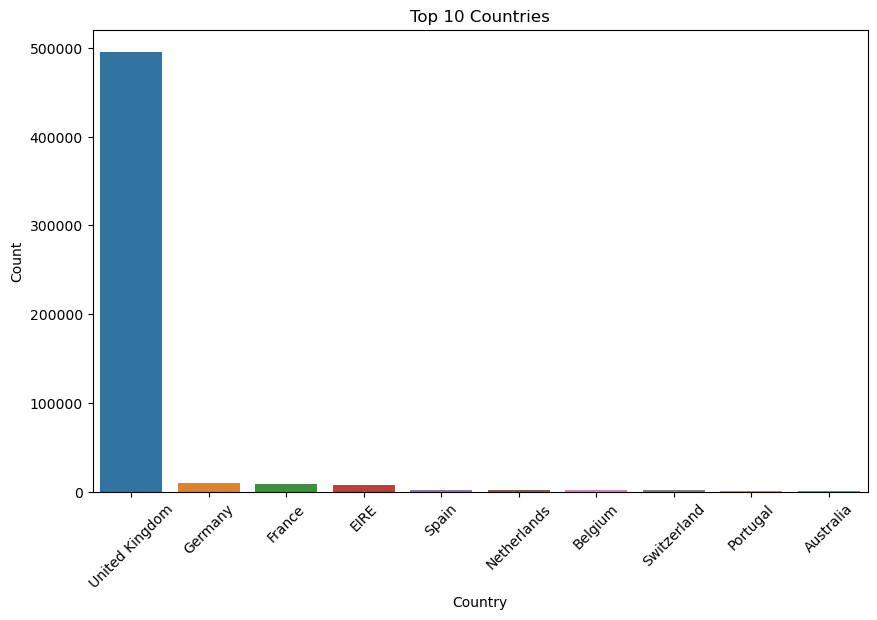

In [11]:
# Bar Chart
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize = (10, 6))

sns.barplot(x = top_countries.index, y = top_countries.values)

plt.title('Top 10 Countries')

plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks( rotation = 45 )

plt.show()

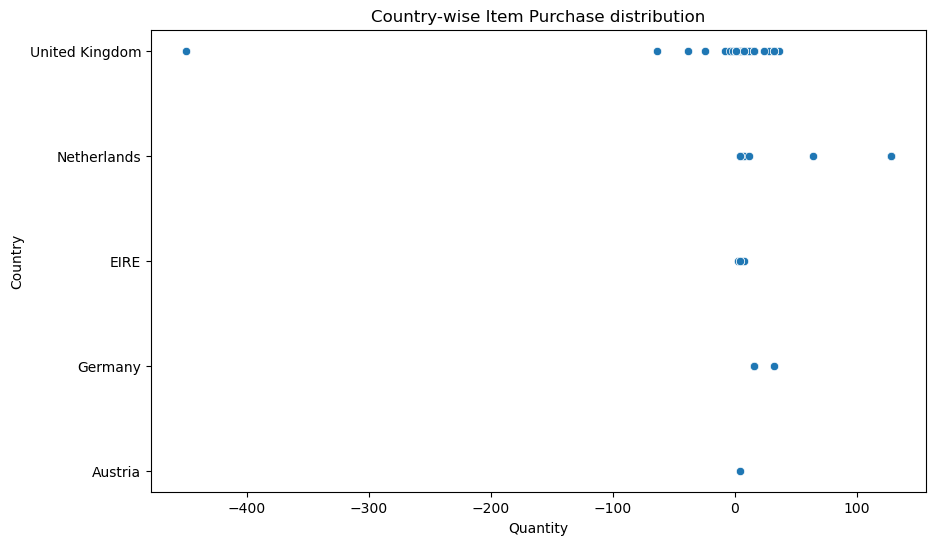

In [12]:
# Each country purchasing products scatterly plotted

stock_code = '84406B'
filtered_df = df[df['StockCode'] == stock_code]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Quantity', y='Country')

plt.title('Country-wise Item Purchase distribution')
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.show()

# Data Processing

In [13]:
# Elimination of negative quantity values so taking all positive quantities

In [14]:
df['CustomerID'].isna().sum()

135080

In [15]:
df = df.loc[df['Quantity'] > 0]

### Handling Nan CustomerID

In [16]:
df = df.dropna(subset = ['CustomerID'])

### Creating the Customer-Item Matrix

In [17]:
customer_item_matrix = df.pivot_table(index = 'CustomerID',
                                     columns = 'StockCode',
                                     values = 'Quantity',
                                     aggfunc = 'sum')
customer_item_matrix.loc[12481:].head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
12483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
12484.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
12488.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [18]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

## Collaborative Filtration:

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

### User Based:

In [20]:
# User Based Collaborative Filtration is a type of filtration model 
# that can process items to a user based on the preferences of similar user

In [21]:
similarity_matrix1 = pd.DataFrame(cosine_similarity(customer_item_matrix))
similarity_matrix1.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [22]:
# Renaming teh index and column names
similarity_matrix1.columns = customer_item_matrix.index
similarity_matrix1['CustomerID'] = customer_item_matrix.index
similarity_matrix1 = similarity_matrix1.set_index('CustomerID')
similarity_matrix1

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


In [23]:
similarity_matrix1.head(10)

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.000000,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.000000,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.000000,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.000000,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
12352.0,0.0,0.038484,0.027756,0.137137,0.031575,1.000000,0.000000,0.102568,0.036108,0.089414,...,0.0,0.157014,0.000000,0.0,0.000000,0.000000,0.000000,0.037582,0.080278,0.033898
12353.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.138675,0.068680,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12354.0,0.0,0.025876,0.027995,0.030737,0.000000,0.102568,0.000000,1.000000,0.000000,0.054109,...,0.0,0.039590,0.000000,0.0,0.000000,0.041523,0.049629,0.000000,0.113354,0.000000
12355.0,0.0,0.136641,0.118262,0.032461,0.000000,0.036108,0.138675,0.000000,1.000000,0.152388,...,0.0,0.083624,0.148250,0.0,0.000000,0.000000,0.000000,0.160128,0.034204,0.108324


In [24]:
similarity_matrix1.loc[12350.0].sort_values(ascending = False).head(10)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
12791.0    0.171499
16754.0    0.171499
12814.0    0.171499
16426.0    0.166968
16333.0    0.161690
Name: 12350.0, dtype: float64

# Making the Recommendation Engine

In [25]:
similarity_matrix1.loc[12350.0].sort_values(ascending = False)
A_item = customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0]

print("The Following Items bought by A: ")
print(A_item)

The Following Items bought by A: 
StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64


In [26]:
B_item = customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0]>0]
print("The following items bought by B:")
print(B_item)

The following items bought by B:
StockCode
20657     1
20659     1
20828     1
20856     1
21051     1
21866     1
21867     1
22208     1
22209     1
22210     1
22211     1
22449     1
22450     1
22551     1
22553     1
22557     1
22640     1
22659     1
22749     1
22752     1
22753     1
22754     1
22755     1
23290     1
23292     1
23309     1
85099B    1
POST      1
Name: 17935.0, dtype: int64


In [27]:
# So Now, we can recommend B to purchase similar products that is recommended by A

In [28]:
B_recom = set(A_item.index) - set(B_item.index)
print("The following items can be recommended items to B: ")

print(B_recom)


The following items can be recommended items to B: 
{20615, 21832, 21864, 22348, 20652, 22412, 22620, '84086C', 21171, 21908, '79191C', 21915, '79066K'}


In [29]:
df.loc[df['StockCode'].isin(B_recom),['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


## Item Based:

In [30]:
# In this process, the model recommends items to a user 
# based on the preferences of similar items.

In [31]:
similarity_matrix2 = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
similarity_matrix2.columns = customer_item_matrix.T.index
similarity_matrix2.index = customer_item_matrix.T.index

In [32]:
similarity_matrix2['StockCode'] = customer_item_matrix.T.index
similarity_matrix2 = similarity_matrix2.set_index('StockCode')

In [33]:
print(similarity_matrix2.head())

StockCode     10002     10080     10120     10125     10133     10135  \
StockCode                                                               
10002      1.000000  0.000000  0.094868  0.090351  0.062932  0.098907   
10080      0.000000  1.000000  0.000000  0.032774  0.045655  0.047836   
10120      0.094868  0.000000  1.000000  0.057143  0.059702  0.041703   
10125      0.090351  0.032774  0.057143  1.000000  0.042644  0.044682   
10133      0.062932  0.045655  0.059702  0.042644  1.000000  0.280097   

StockCode     11001     15030     15034     15036  ...  90214V  90214W  \
StockCode                                          ...                   
10002      0.095346  0.047673  0.075593  0.090815  ...     0.0     0.0   
10080      0.000000  0.000000  0.082261  0.049413  ...     0.0     0.0   
10120      0.060302  0.060302  0.095618  0.028718  ...     0.0     0.0   
10125      0.043073  0.000000  0.051224  0.030770  ...     0.0     0.0   
10133      0.045002  0.060003  0.071358  0.0

##  Making recommendation system:

In [34]:

similar_top10_item = list(similarity_matrix2.loc[23166].sort_values(ascending=False).iloc[:10].index)

print(similar_top10_item)
print('\n')
print(df.loc[
    df['StockCode'].isin(similar_top10_item),
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[similar_top10_item])

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]


                                   Description
StockCode                                     
23166           MEDIUM CERAMIC TOP STORAGE JAR
23165            LARGE CERAMIC TOP STORAGE JAR
23167           SMALL CERAMIC TOP STORAGE JAR 
22993             SET OF 4 PANTRY JELLY MOULDS
23307      SET OF 60 PANTRY DESIGN CAKE CASES 
22722        SET OF 6 SPICE TINS PANTRY DESIGN
22720        SET OF 3 CAKE TINS PANTRY DESIGN 
22666          RECIPE BOX PANTRY YELLOW DESIGN
23243      SET OF TEA COFFEE SUGAR TINS PANTRY
22961                   JAM MAKING SET PRINTED


C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## Apriori:

In [36]:
!pip install mlxtend

In [37]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [38]:
df = pd.read_excel('retail.xlsx')

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')

transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).values.tolist()

#Encoding transactions into a transaction matrix

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Association rules
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Frequent itemsets

print("Frequent Itemsets:")
print(frequent_itemsets)

# Association rules
print("Association Rules:")
print(association_rules)

Frequent Itemsets:
     support   itemsets
0   0.070940  (20725.0)
1   0.057704  (20727.0)
2   0.052128  (20728.0)
3   0.059834  (21212.0)
4   0.053669  (21931.0)
5   0.052581  (22086.0)
6   0.063098  (22197.0)
7   0.052445  (22382.0)
8   0.058248  (22383.0)
9   0.055211  (22386.0)
10  0.053261  (22411.0)
11  0.090295  (22423.0)
12  0.056616  (22457.0)
13  0.054531  (22469.0)
14  0.050632  (22666.0)
15  0.062962  (22720.0)
16  0.051358  (22960.0)
17  0.052672  (22961.0)
18  0.055845  (23203.0)
19  0.051992  (23298.0)
20  0.076424  (47566.0)
21  0.065999  (84879.0)
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [39]:
frequent_itemset_desc = frequent_itemsets.sort_values(by = 'support', ascending = False)
print(frequent_itemset_desc)

     support   itemsets
11  0.090295  (22423.0)
20  0.076424  (47566.0)
0   0.070940  (20725.0)
21  0.065999  (84879.0)
6   0.063098  (22197.0)
15  0.062962  (22720.0)
3   0.059834  (21212.0)
8   0.058248  (22383.0)
1   0.057704  (20727.0)
12  0.056616  (22457.0)
18  0.055845  (23203.0)
9   0.055211  (22386.0)
13  0.054531  (22469.0)
4   0.053669  (21931.0)
10  0.053261  (22411.0)
17  0.052672  (22961.0)
5   0.052581  (22086.0)
7   0.052445  (22382.0)
2   0.052128  (20728.0)
19  0.051992  (23298.0)
16  0.051358  (22960.0)
14  0.050632  (22666.0)
